In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/retail-transactions-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'retail-transactions-dataset' dataset.
Path to dataset files: /kaggle/input/retail-transactions-dataset


In [3]:
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "prasad22/retail-transactions-dataset",
  'Retail_Transactions_Dataset.csv'
)
df.head()

Using Colab cache for faster access to the 'retail-transactions-dataset' dataset.


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [4]:
df = df.drop(columns=['Transaction_ID','Date','Product','Customer_Name','Customer_Category'])

In [5]:
df.head()

,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Season,Promotion
0,3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Winter,NaN
1,2,25.93,Cash,San Francisco,Specialty Store,True,Fall,BOGO (Buy One Get One)
2,6,41.49,Credit Card,Houston,Department Store,True,Winter,NaN
3,1,39.34,Mobile Payment,Chicago,Pharmacy,True,Spring,NaN
4,10,16.42,Debit Card,Houston,Specialty Store,False,Winter,Discount on Selected Items


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Total_Items       1000000 non-null  int64  
 1   Total_Cost        1000000 non-null  float64
 2   Payment_Method    1000000 non-null  object 
 3   City              1000000 non-null  object 
 4   Store_Type        1000000 non-null  object 
 5   Discount_Applied  1000000 non-null  bool   
 6   Season            1000000 non-null  object 
 7   Promotion         666057 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 54.4+ MB


In [7]:
from ast import Dict
le = LabelEncoder()
encode = {}
for col in df.columns:
    if df[col].dtype not in ('int64','float64'):
        df[col] = le.fit_transform(df[col])
        encode[col] = dict(zip(le.classes_,le.transform(le.classes_)))

In [8]:
for col,map in encode.items():
    print(f"{col}\n")
    for val,key in map.items():
        print(f"{val} ----> {key}")
    print()


Payment_Method

Cash ----> 0
Credit Card ----> 1
Debit Card ----> 2
Mobile Payment ----> 3

City

Atlanta ----> 0
Boston ----> 1
Chicago ----> 2
Dallas ----> 3
Houston ----> 4
Los Angeles ----> 5
Miami ----> 6
New York ----> 7
San Francisco ----> 8
Seattle ----> 9

Store_Type

Convenience Store ----> 0
Department Store ----> 1
Pharmacy ----> 2
Specialty Store ----> 3
Supermarket ----> 4
Warehouse Club ----> 5

Discount_Applied

False ----> 0
True ----> 1

Season

Fall ----> 0
Spring ----> 1
Summer ----> 2
Winter ----> 3

Promotion

BOGO (Buy One Get One) ----> 0
Discount on Selected Items ----> 1
nan ----> 2



In [9]:
sc = StandardScaler()
df_normalize = sc.fit_transform(df)

In [10]:
df_normalize

array([[-0.86916533,  0.70010566,  1.34236095, ...,  0.99979202,
         1.34261439,  1.22324168],
       [-1.21739685, -0.96747435, -1.34104786, ...,  0.99979202,
        -1.34064487, -1.22631833],
       [ 0.17552923, -0.39994274, -0.44657826, ...,  0.99979202,
         1.34261439,  1.22324168],
       ...,
       [-0.86916533,  0.30217701, -0.44657826, ..., -1.00020802,
         1.34261439,  1.22324168],
       [-0.86916533, -1.05683504,  0.44789134, ...,  0.99979202,
         1.34261439, -1.22631833],
       [ 0.87199227, -0.30401677, -0.44657826, ..., -1.00020802,
        -1.34064487, -0.00153832]])

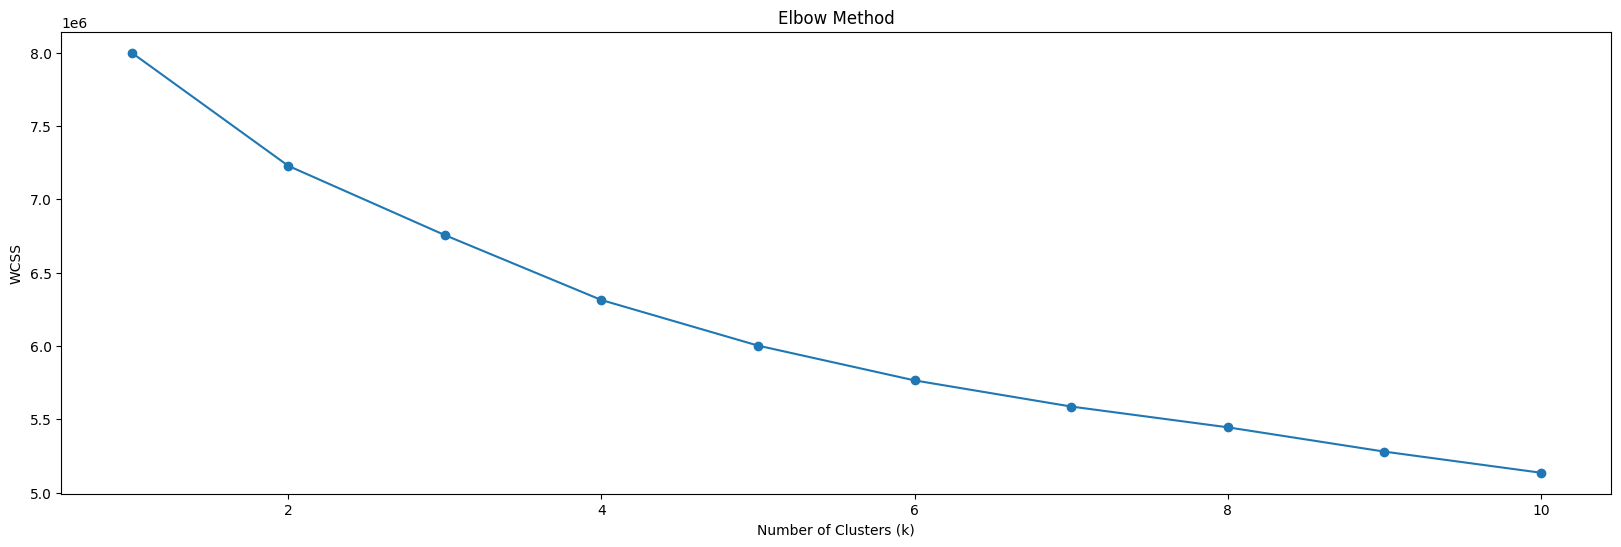

In [11]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalize)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [12]:
Kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = Kmeans.fit_predict(df_normalize)

In [13]:
df

,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Season,Promotion,Cluster
0,3,71.65,3,5,5,1,3,2,0
1,2,25.93,0,8,3,1,0,0,1
2,6,41.49,1,4,1,1,3,2,0
3,1,39.34,3,2,2,1,1,2,0
4,10,16.42,2,4,3,0,3,1,5
...,...,...,...,...,...,...,...,...,...
999995,1,22.07,2,5,4,0,3,2,2
999996,8,80.25,0,4,5,1,1,1,3
999997,3,60.74,1,5,0,0,3,2,7
999998,3,23.48,2,8,4,1,3,0,1


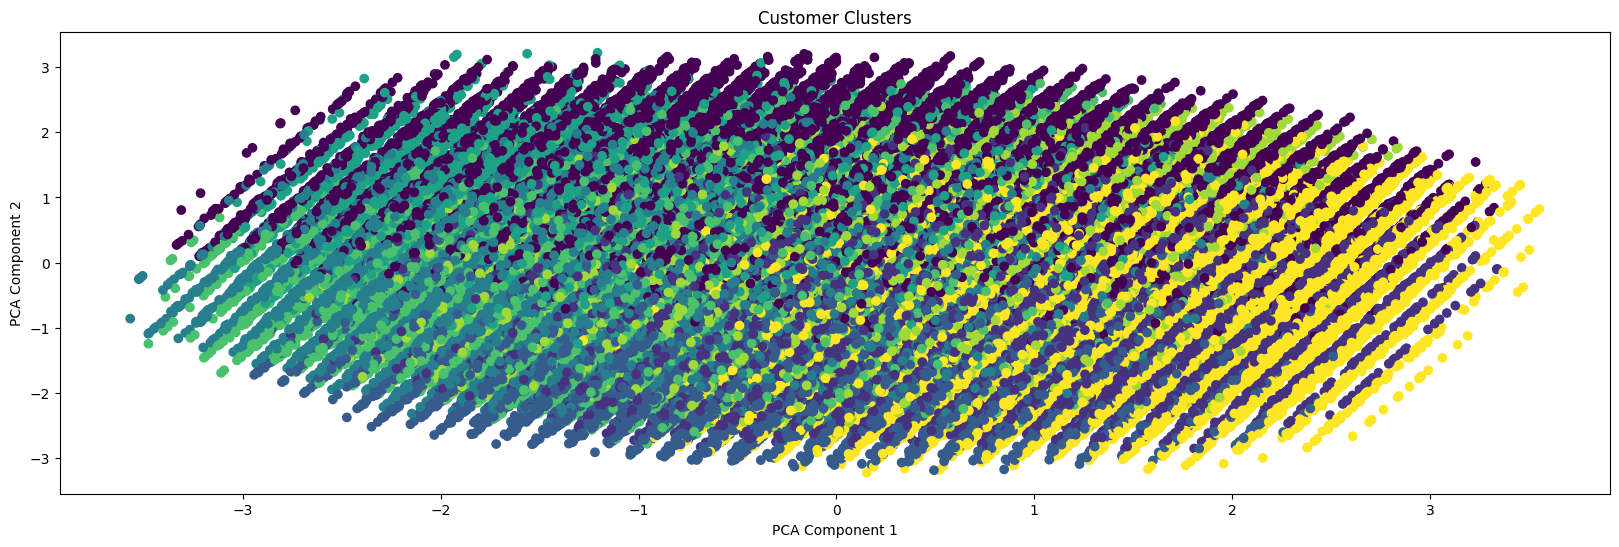

In [20]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalize)

plt.figure(figsize=(20, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters")
plt.show()